# Gross-Pitaevskii equation with magnetism

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.

In [1]:
using DFTK
using StaticArrays
using Plots

Unit cell. Having one of the lattice vectors as zero means a 2D system

In [2]:
a = 10
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

Confining scalar potential, and magnetic vector potential

In [3]:
pot(x, y, z) = (x - a/2)^2 + (y - a/2)^2
Apot(x, y, z) = .2 * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);

Parameters

In [4]:
Ecut = 20  # Increase this for production
C = 500.0
α = 2
n_electrons = 1;  # Increase this for fun

Collect all the terms, build and run the model

Iter     Function value   Gradient norm 
     0     3.565453e+01     1.544181e+01
 * time: 0.0016741752624511719
     1     3.541996e+01     9.269334e+00
 * time: 0.004450082778930664
     2     2.386922e+01     2.722681e+00
 * time: 0.01052999496459961
     3     2.069717e+01     2.680669e+00
 * time: 0.015839099884033203
     4     1.984854e+01     1.563086e+00
 * time: 0.021100997924804688
     5     1.938592e+01     1.611658e+00
 * time: 0.02530503273010254
     6     1.897780e+01     1.101916e+00
 * time: 0.029584169387817383
     7     1.863327e+01     9.402250e-01
 * time: 0.033828020095825195
     8     1.829441e+01     9.135562e-01
 * time: 0.0380711555480957
     9     1.802932e+01     8.296759e-01
 * time: 0.04229021072387695
    10     1.782132e+01     7.353998e-01
 * time: 0.04659318923950195
    11     1.775713e+01     1.630546e+00
 * time: 0.05023312568664551
    12     1.763906e+01     1.025972e+00
 * time: 0.054913997650146484
    13     1.754378e+01     9.411554e-01
 

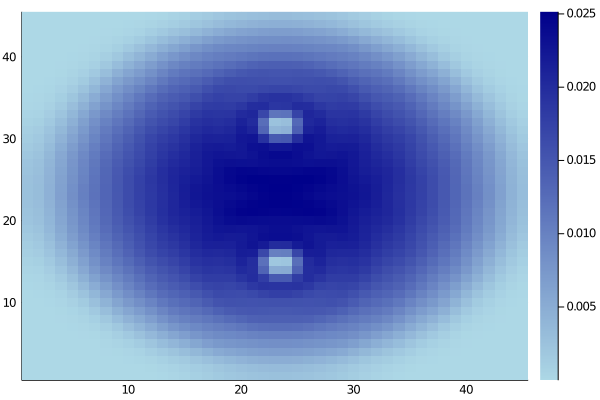

In [5]:
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         PowerNonlinearity(C, α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons=n_electrons,
              terms=terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model, Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ.real[:, :, 1], c=:blues)